# **A Quick Tutorial on AI Techniques**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2022-04-15
---

> <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.



---

## **Import Common Library**

In [705]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Answer Function**

In [706]:
def print_answer(model, columns):
    import pandas as pd
    
    ANSWER_CSV_PATH = "./Ex2-Class-unseen.csv"
    answer_df = pd.read_csv(ANSWER_CSV_PATH)

    # NOTE: DATA PREPROCESSING
    answer_df = pd.get_dummies(answer_df, columns=["x3"])
    answer_df = pd.get_dummies(answer_df, columns=["x4"])
    answer_df = pd.get_dummies(answer_df, columns=["x5"])

    answer_df["x4_p"] = 0
    answer_df["x5_u"] = 0

    print(model.predict(answer_df[columns].values))
    print(model.predict_proba(answer_df[columns].values))
    print(model.classes_)
    
    

## **Print Result Function**

In [707]:
def print_result(acc, prec, recall, f1, con, report, roc, loss):
    import seaborn as sns

    print("Accuracy :", acc)
    print("Precision :", prec)
    print("Recall :", recall)
    print("F1 :", f1)
    print("Confustion Matrix :\n", con)
    print("Classification Report :\n", report)
    print("Roc score :", roc)
    print("Log Loss :", loss)
    
    sns.heatmap(con, annot=True, cmap='Blues')


In [708]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

def print_score(y_test, y_pred, y_pred_proba, avg='micro', mt_class='ovr'):
    acc = accuracy_score(y_test, y_pred);
    prec = precision_score(y_test, y_pred, average=avg);
    recall = recall_score(y_test, y_pred, average=avg);
    f1 = f1_score(y_test, y_pred, average=avg);
    con = confusion_matrix(y_test, y_pred);
    report = classification_report(y_test, y_pred);
    roc = roc_auc_score(y_test, y_pred_proba,  multi_class=mt_class);
    loss = log_loss(y_test, y_pred_proba);

    print_result(acc, prec, recall, f1, con, report, roc, loss)

    return acc, prec, recall, f1, con, report, roc, loss


## **Data Cleaning**

         id     x1    x2 x3 x4 x5     x6     x7     x8     x9    x10    y
0    id-001   4.98  0.55  e  n  y   8.29   1.29  -8.60 -20.77 -15.64  NaN
1    id-002   3.71  6.33  g  n  v   9.84  -1.12  -4.00 -18.82  -7.02    D
2    id-003  26.50   NaN  e  o  v  21.63  20.27  13.96   3.36   0.66    D
3    id-004  11.39  6.29  h  o  w   0.70  11.14   7.19  15.62   1.59    A
4    id-005   5.95  4.40  f  l  v  30.71   6.22  30.21   4.33  -4.27    D
..      ...    ...   ... .. .. ..    ...    ...    ...    ...    ...  ...
485  id-486  20.57  1.46  g  p  x -21.54  21.11 -52.55 -24.60   4.89    B
486  id-487  17.58 -3.73  e  l  w  -3.04 -21.11  38.80  29.34  -1.71    A
487  id-488   9.29  4.58  e  n  u  -9.01 -14.15   9.94   8.72  -2.94    C
488  id-489   7.59  9.15  f  p  w   4.35  16.51  -9.61  -4.13 -12.14    D
489  id-490  26.01 -0.67  i  m  w  19.17   2.95  31.00  12.19  -5.23    A

[490 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (t

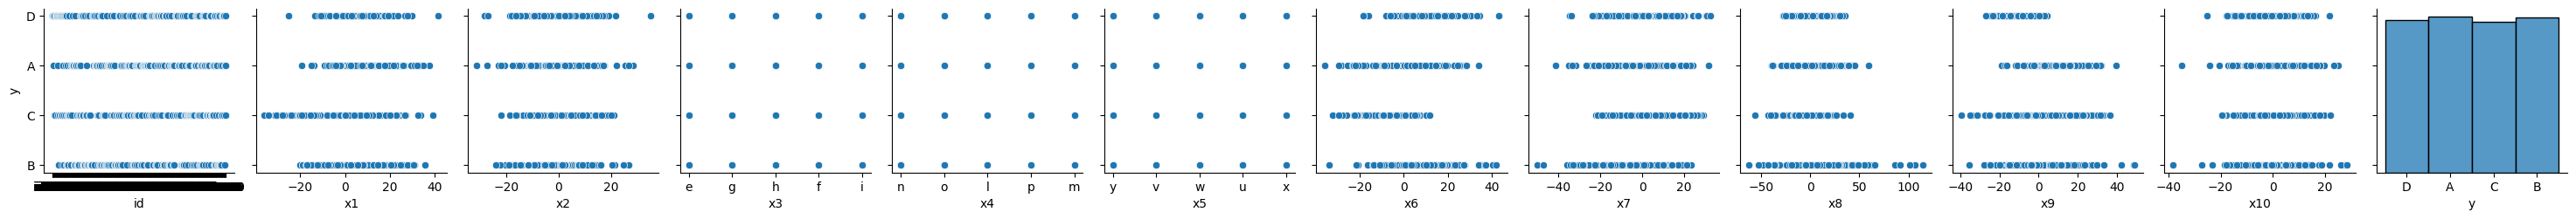

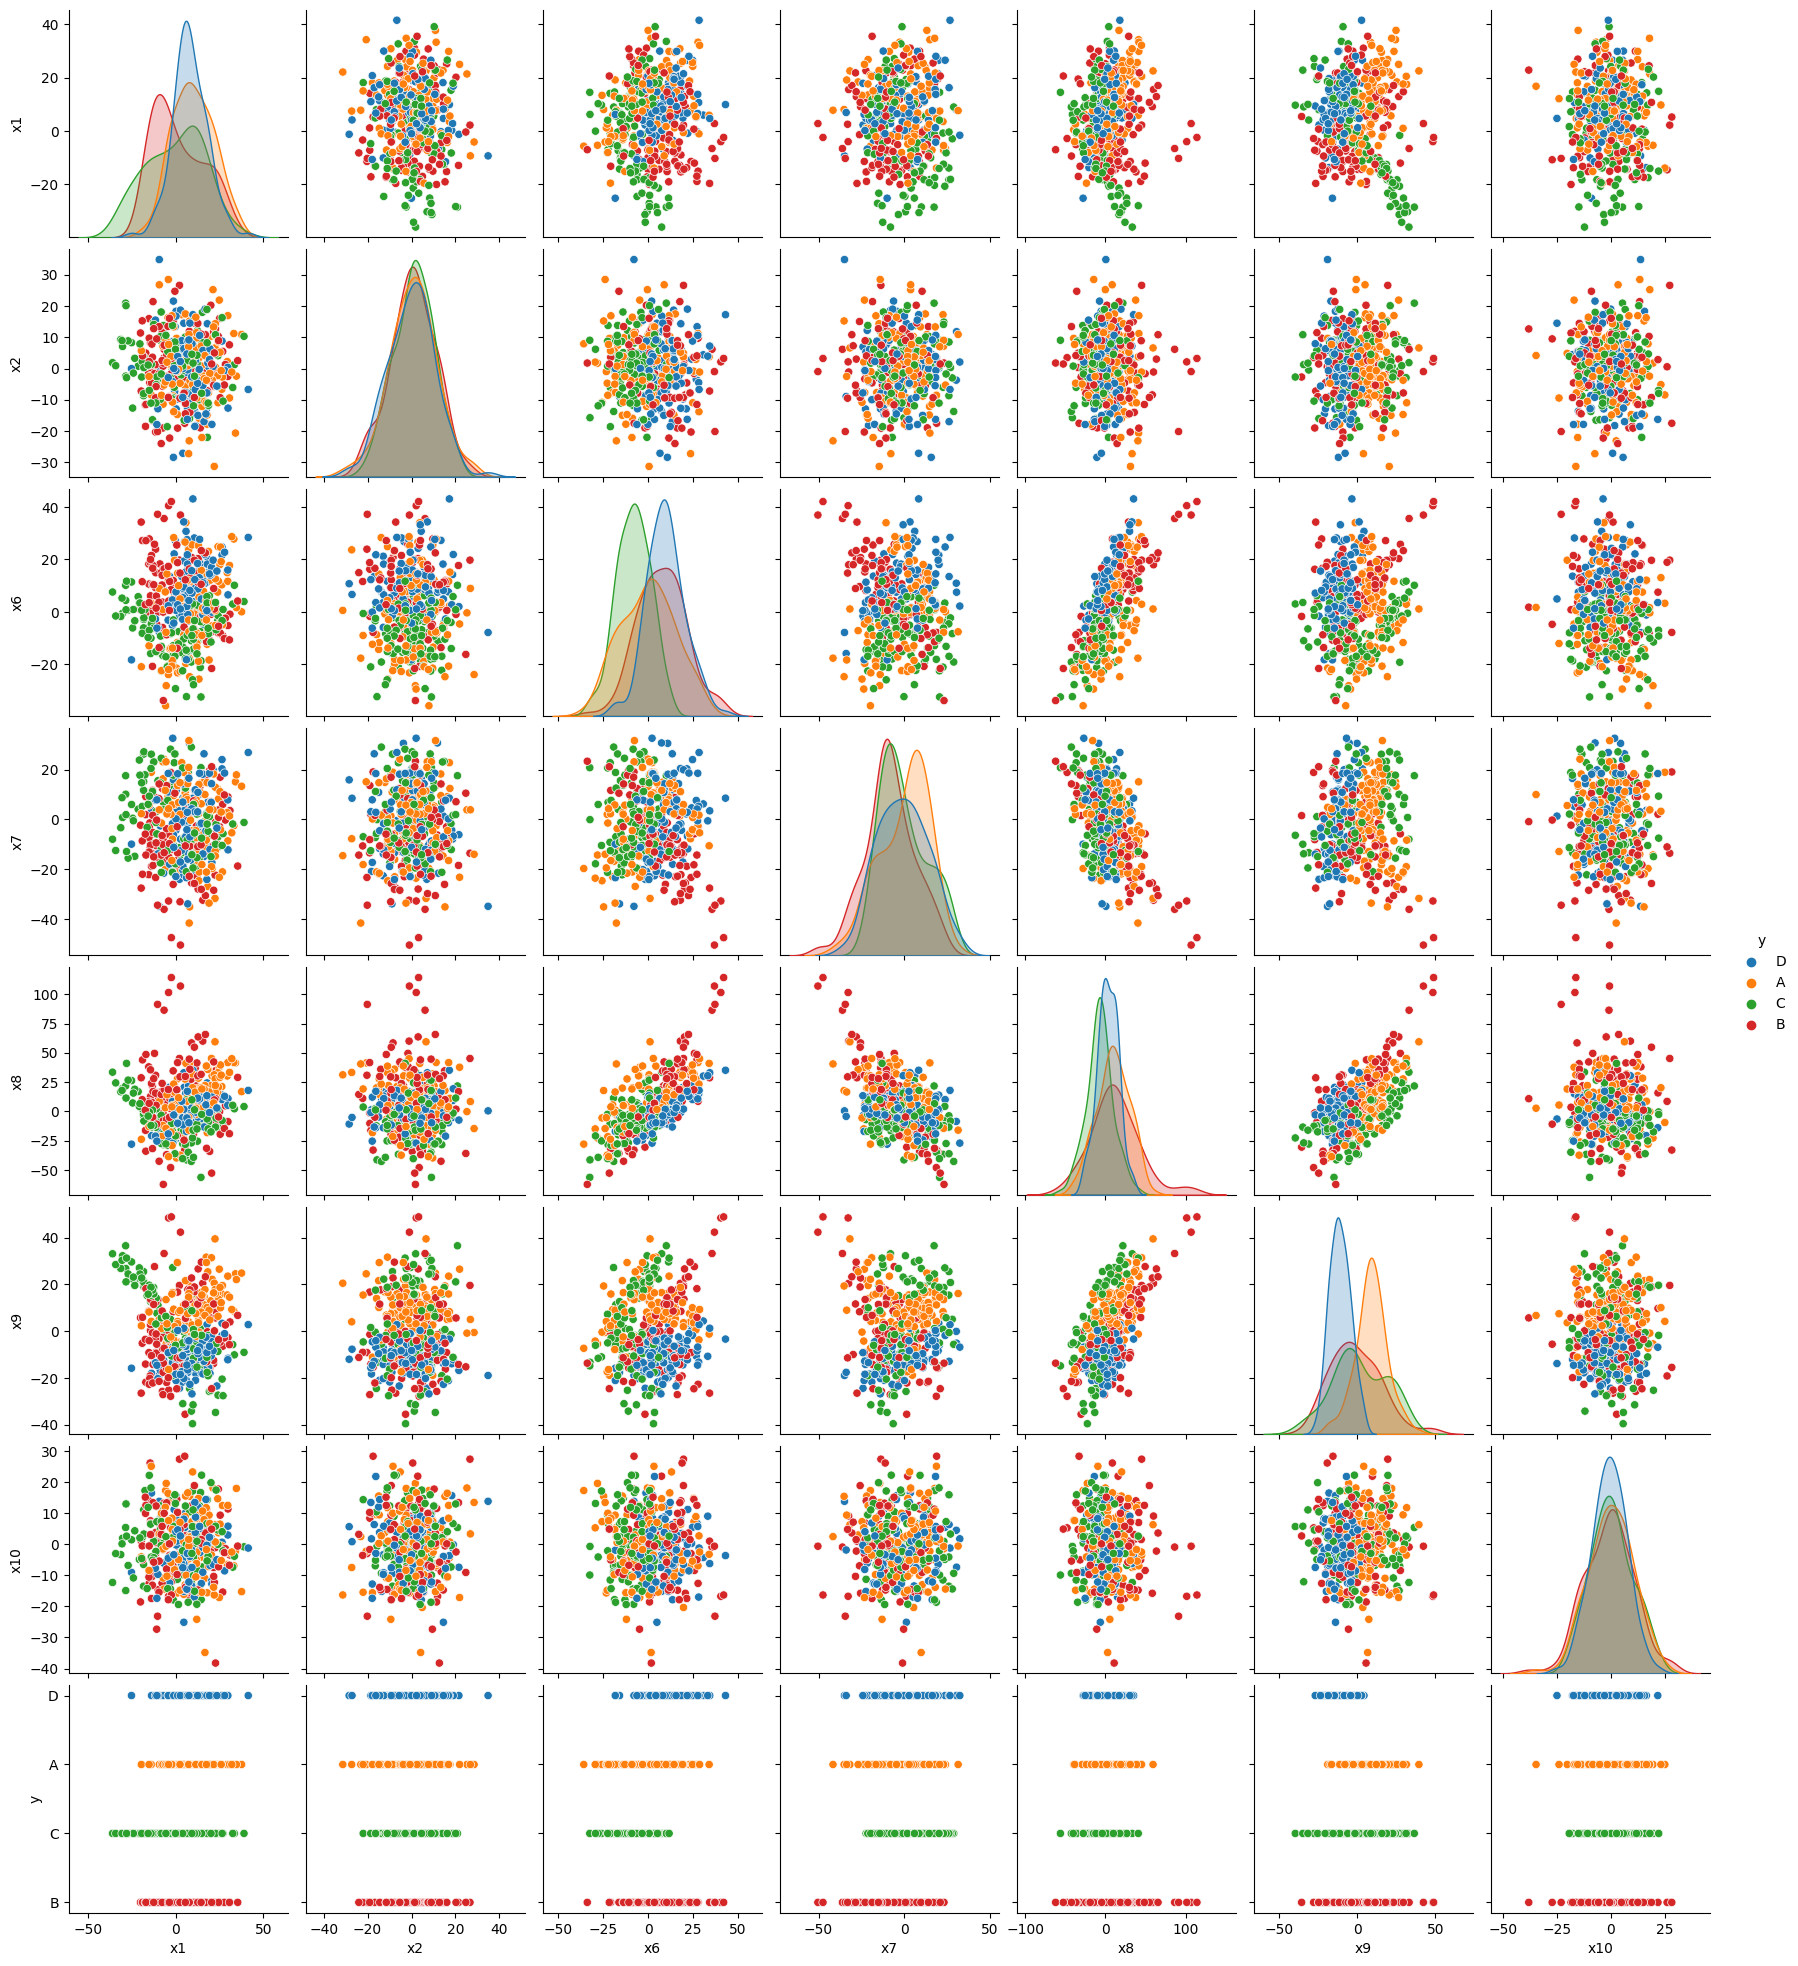

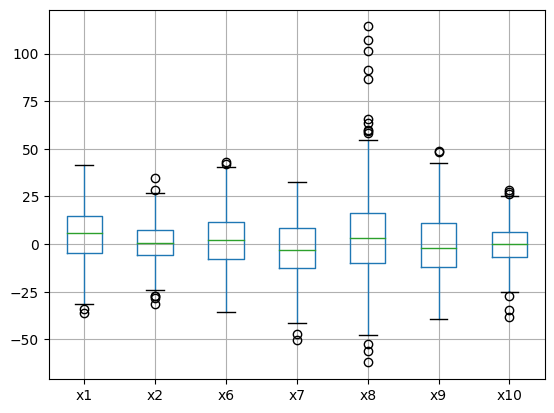

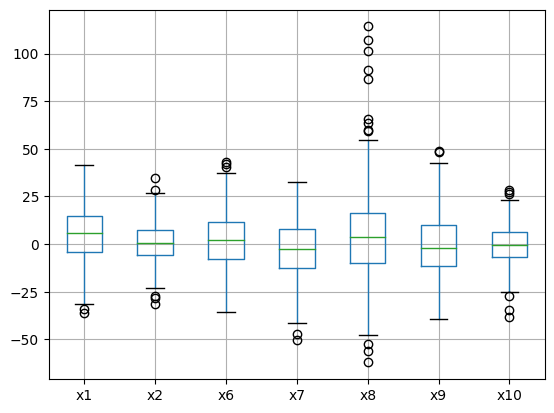

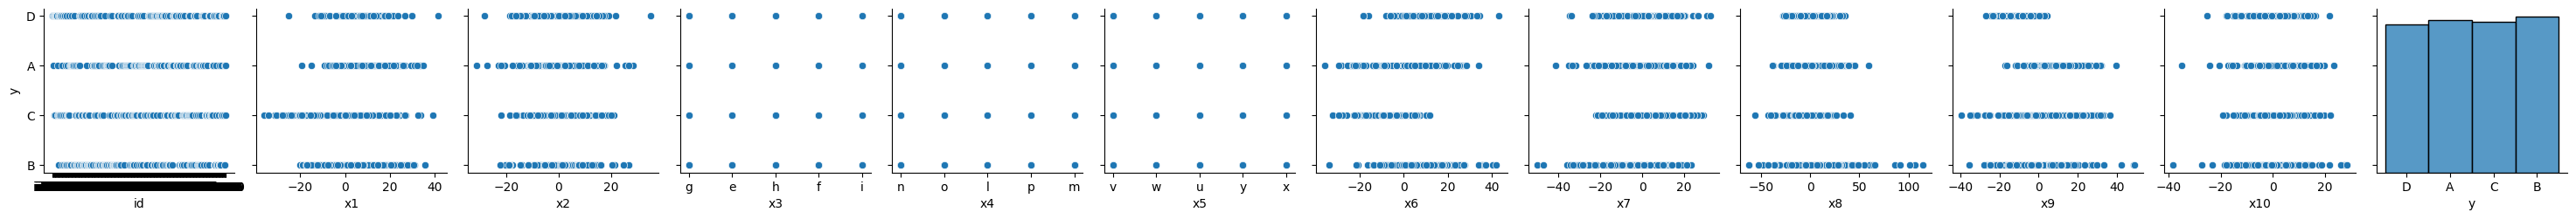

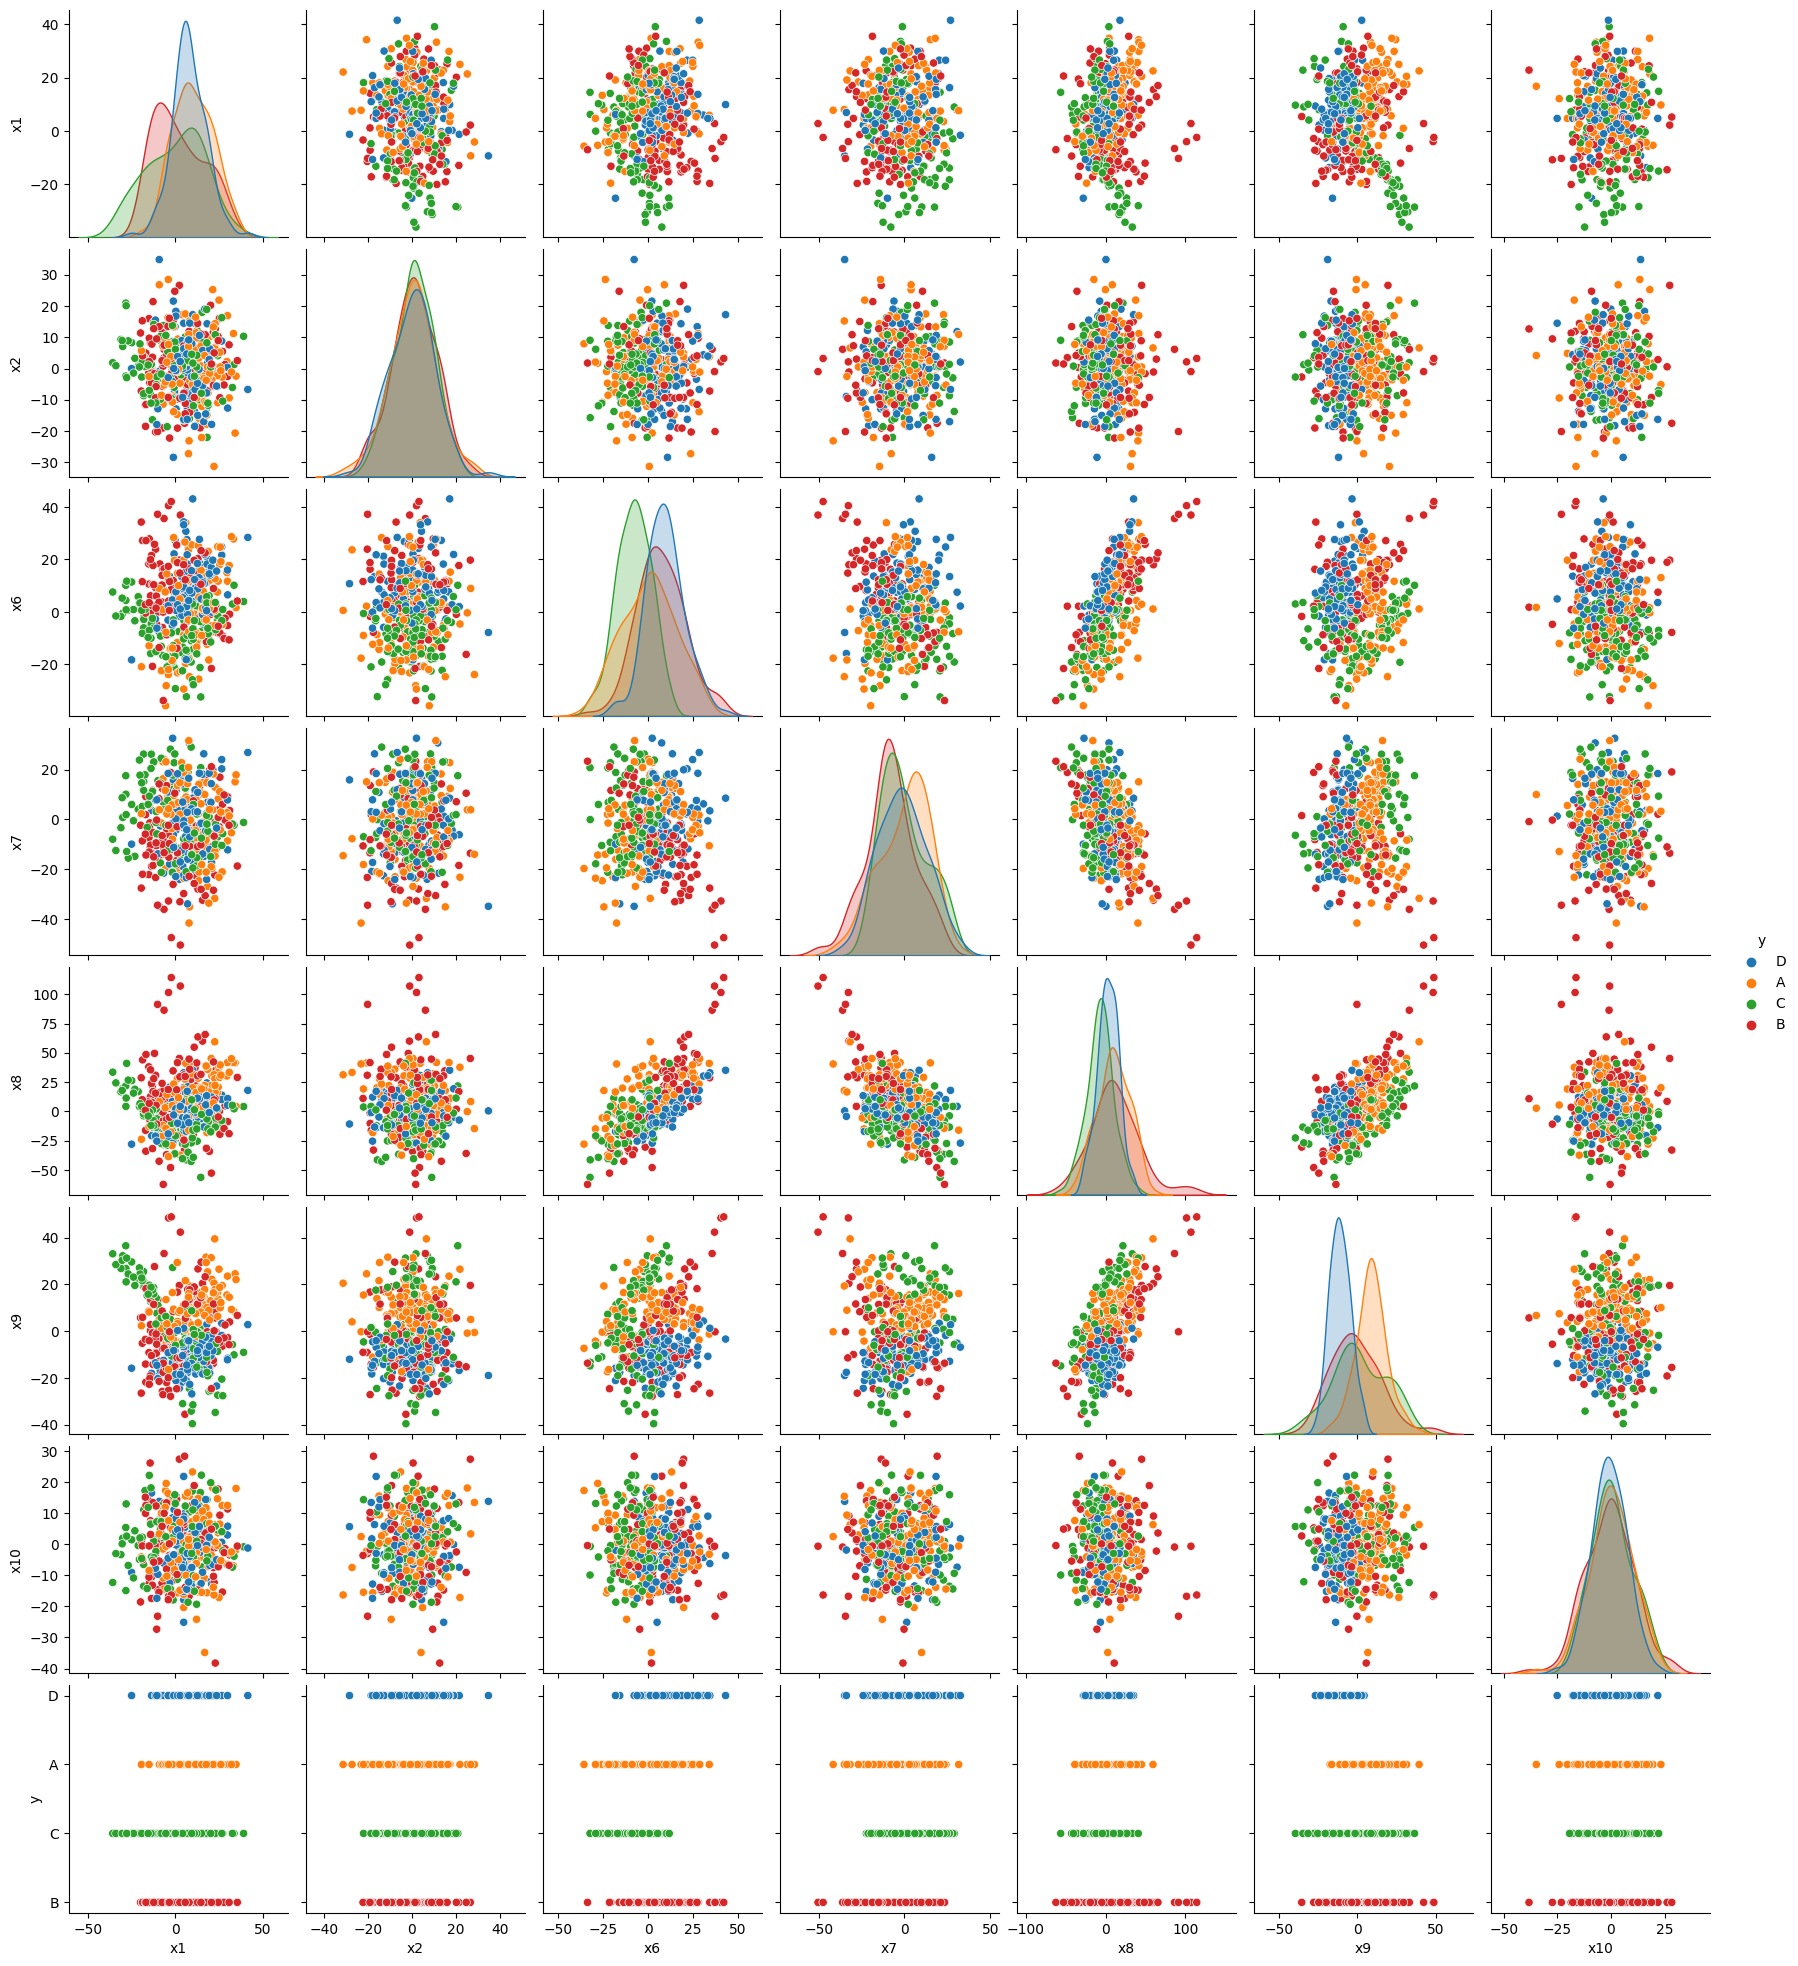

In [709]:
CSV_PATH = "./Ex2-Class-train.csv"
df = pd.read_csv(CSV_PATH)
print(df)
print(df.info())

# check data exploration
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

# BOXPLOT

boxplot_columns = ['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10']

# check data exploration all
sns.pairplot(df, x_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10'], y_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'], hue="y")


plt.figure()
df.boxplot(column=boxplot_columns)


# CAP OUTLIERS
# for col in boxplot_columns:
#     low, high = df[col].quantile([0.05, 0.95])
#     df.loc[df[df[col] < low].index, col] = low
#     df.loc[df[df[col] > high].index, col] = high

# FILL VALUE
for col in boxplot_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# for col in ['x3', 'x4', 'x5']:
#     df[col].fillna(df[col].mode()[0], inplace=True)

# DROP VALUE
# drop if n/a for column y
df.dropna(subset=['x3', 'x4', 'x5','y'], inplace=True)


# RESULT

# BOXPLOT
plt.figure()
df.boxplot(column=boxplot_columns)

# check data exploration
sns.pairplot(df, x_vars=df.columns, y_vars=["y"])

# check data exploration all
sns.pairplot(df, x_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10'], y_vars=['x1', 'x2', 'x6', 'x7', 'x8', 'x9', 'x10', 'y'], hue="y")

# print(df.sort_values(by=boxplot_columns));
print(df)
print(df.info())


### Train-Test Split

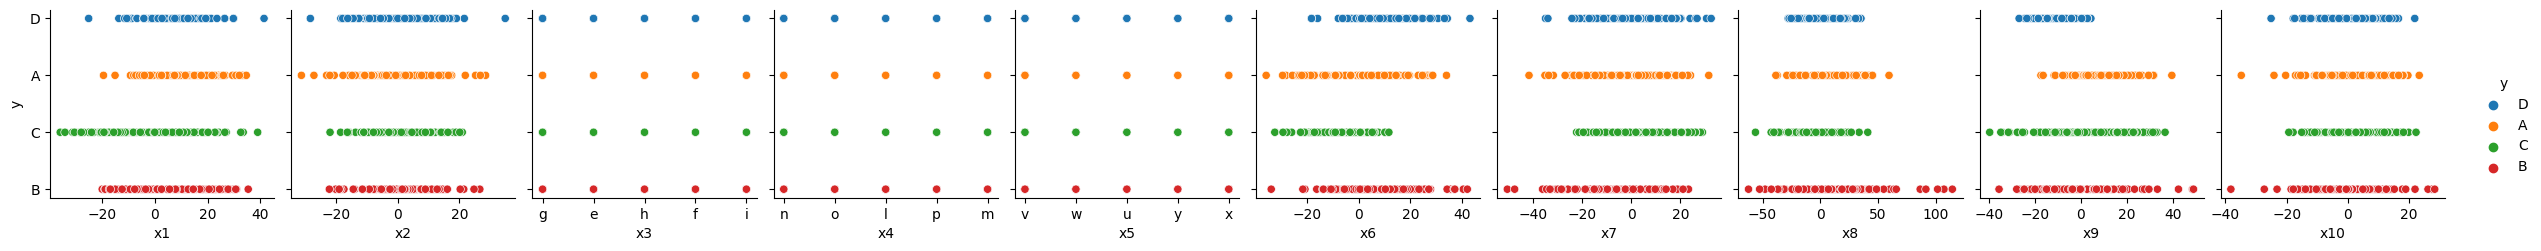

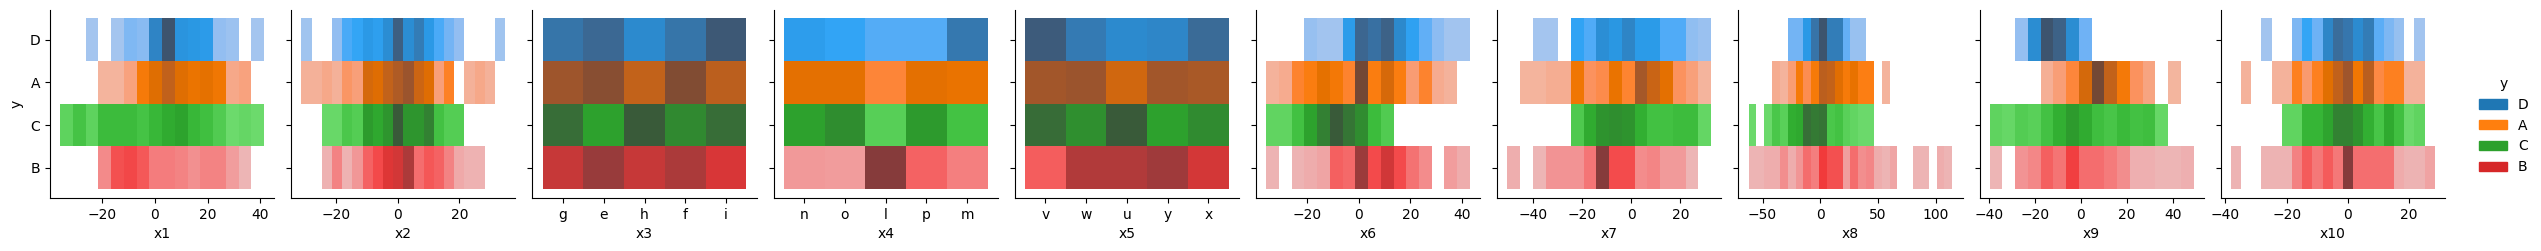

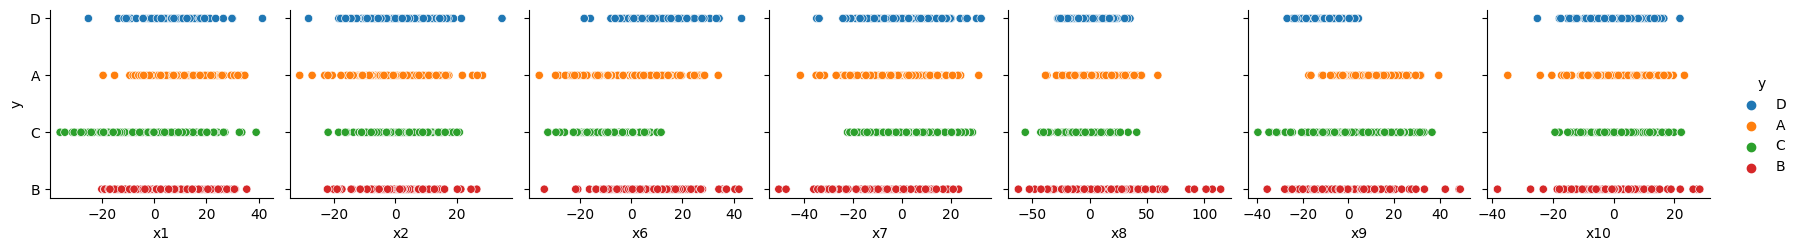

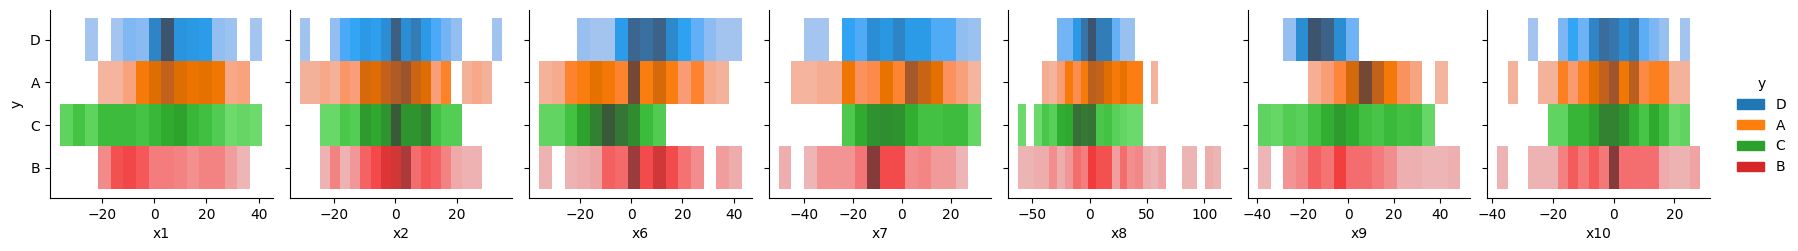

In [710]:
x_columns_all = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
x_columns = ["x1","x2","x6","x7","x8","x9","x10"]
#x_columns = ["x1","x8","x9"]
y_column = 'y';
X = df[x_columns]
y = df[y_column]

# plt.figure()
# sns.countplot(x="y", data=df,  hue="y");

# plt.figure()
# sns.countplot(x='x3', data=df,  hue="y");

# plt.figure()

# sns.countplot(x='x4', data=df,  hue="y");

# plt.figure()
# sns.countplot(x='x5', data=df,  hue="y");


# check data exploration
sns.pairplot(df, x_vars=x_columns_all, y_vars=["y"], hue="y")
# check data exploration
sns.pairplot(df, x_vars=x_columns_all, y_vars=["y"], hue="y", kind="hist")

# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y")
# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y", kind="hist")

In [711]:
from sklearn.preprocessing import LabelEncoder

# lb_make = LabelEncoder()
# df['x3'] = lb_make.fit_transform(df['x3'])

df = pd.get_dummies(df, columns=["x3"])
df = pd.get_dummies(df, columns=["x4"])
df = pd.get_dummies(df, columns=["x5"])

In [712]:
df

id     x1      x2     x6     x7     x8     x9    x10  y  x3_e  ...  \
1    id-002   3.71  6.3300   9.84  -1.12  -4.00 -18.82  -7.02  D     0  ...   
2    id-003  26.50  0.5145  21.63  20.27  13.96   3.36   0.66  D     1  ...   
3    id-004  11.39  6.2900   0.70  11.14   7.19  15.62   1.59  A     0  ...   
4    id-005   5.95  4.4000  30.71   6.22  30.21   4.33  -4.27  D     0  ...   
5    id-006  14.07 -7.9900 -21.16  -9.17 -10.81   1.19   8.97  C     0  ...   
..      ...    ...     ...    ...    ...    ...    ...    ... ..   ...  ...   
485  id-486  20.57  1.4600 -21.54  21.11 -52.55 -24.60   4.89  B     0  ...   
486  id-487  17.58 -3.7300  -3.04 -21.11  38.80  29.34  -1.71  A     1  ...   
487  id-488   9.29  4.5800  -9.01 -14.15   9.94   8.72  -2.94  C     1  ...   
488  id-489   7.59  9.1500   4.35  16.51  -9.61  -4.13 -12.14  D     0  ...   
489  id-490  26.01 -0.6700  19.17   2.95  31.00  12.19  -5.23  A     0  ...   

     x4_l  x4_m  x4_n  x4_o  x4_p  x5_u  x5_v  x5_w  x5_x  x5_y  
1       0     0     1     0     0     0     1     0     0     0  
2       0     0     0     1     0     0     1     0     0     0  
3       0     0     0     1     0     0     0     1     0     0  
4       1     0     0     0     0     0     1     0     0     0  
5       0     0     0     1     0     1     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
485     0     0     0     0     1     0     0     0     1     0  
486     1     0     0     0     0     0     0     1     0     0  
487     0     0     1     0     0     1     0     0     0     0  
488     0     0     0     0     1     0     0     1     0     0  
489     0     1     0     0     0     0     0     1     0     0  

[451 rows x 24 columns]

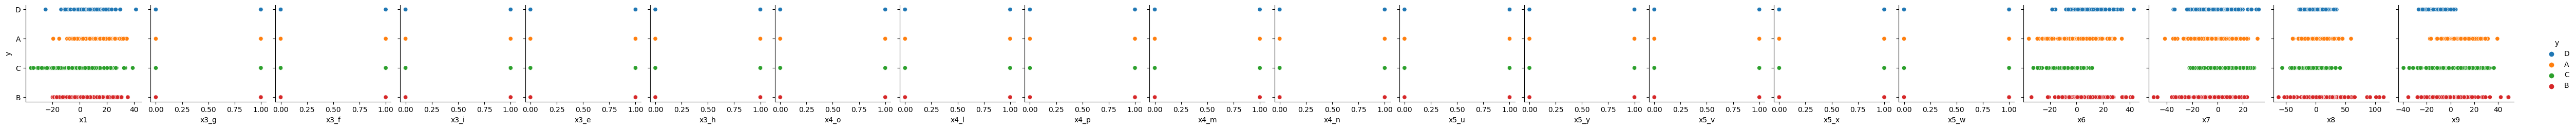

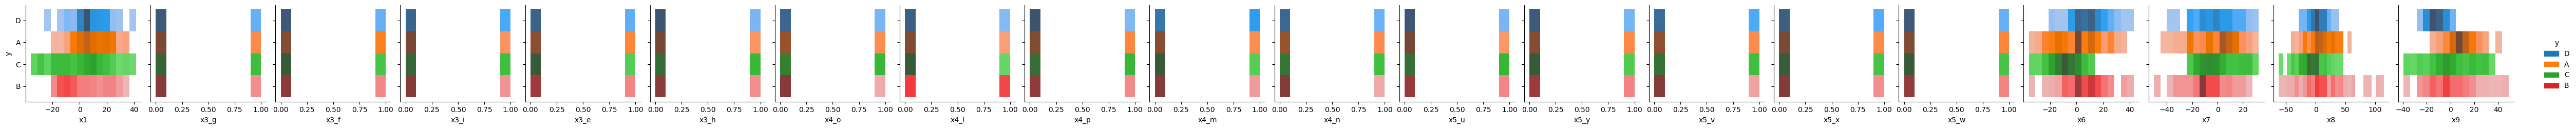

In [713]:
# NEW X_Columns 
x3Values = ['g','f','i','e','h']
x4Values = ['o' 'l' 'p' 'm' 'n']
x5Values = ['u', 'y', 'v', 'x', 'w']

# x_columns = ["x1","x2","x3_g","x3_f","x3_i","x3_e","x3_h","x4_o","x4_l","x4_p","x4_m","x4_n","x5_u","x5_y","x5_v","x5_x","x5_w","x6","x7","x8","x9","x10"]
x_columns = ["x1","x3_g","x3_f","x3_i","x3_e","x3_h","x4_o","x4_l","x4_p","x4_m","x4_n","x5_u","x5_y","x5_v","x5_x","x5_w","x6","x7","x8","x9"]
X = df[x_columns]


# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y")
# check data exploration
sns.pairplot(df, x_vars=x_columns, y_vars=["y"], hue="y", kind="hist")

In [714]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

## **Decision Tree**

### Import Libraries

In [715]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Model

In [716]:
model = DecisionTreeClassifier()

In [717]:
model.fit(X_train.values, y_train)

DecisionTreeClassifier()

In [718]:
print(tree.export_text(model))

|--- feature_16 <= -1.71
|   |--- feature_0 <= 19.27
|   |   |--- feature_17 <= -19.06
|   |   |   |--- feature_13 <= 0.50
|   |   |   |   |--- feature_0 <= -6.90
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- class: D
|   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |--- class: C
|   |   |   |   |--- feature_0 >  -6.90
|   |   |   |   |   |--- class: A
|   |   |   |--- feature_13 >  0.50
|   |   |   |   |--- class: C
|   |   |--- feature_17 >  -19.06
|   |   |   |--- feature_19 <= -8.05
|   |   |   |   |--- feature_17 <= 6.71
|   |   |   |   |   |--- feature_18 <= -3.23
|   |   |   |   |   |   |--- class: C
|   |   |   |   |   |--- feature_18 >  -3.23
|   |   |   |   |   |   |--- class: D
|   |   |   |   |--- feature_17 >  6.71
|   |   |   |   |   |--- feature_16 <= -6.22
|   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |--- clas

### Prediction

In [719]:
# model.predict([[5,3,1,1]]) # NOTE : EDIT VALUE HERE

In [720]:
# model.predict_proba([[5,3,1,1]]) # NOTE : EDIT VALUE HERE

In [721]:
model.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

### Evaluation

In [722]:
y_pred = model.predict(X_test.values)

In [723]:
y_pred

array(['C', 'B', 'B', 'C', 'D', 'C', 'B', 'C', 'D', 'D', 'A', 'A', 'B',
       'D', 'D', 'A', 'B', 'A', 'D', 'A', 'D', 'A', 'C', 'A', 'A', 'C',
       'C', 'A', 'A', 'B', 'A', 'B', 'D', 'B', 'A', 'D', 'B', 'B', 'C',
       'D', 'A', 'C', 'C', 'D', 'B', 'C', 'C', 'D', 'B', 'C', 'A', 'A',
       'C', 'C', 'B', 'B', 'C', 'A', 'A', 'B', 'B', 'C', 'C', 'A', 'D',
       'B', 'B', 'A', 'C', 'B', 'A', 'B', 'D', 'D', 'A', 'B', 'C', 'B',
       'D', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'A', 'A', 'D', 'D',
       'A', 'D', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'D', 'C', 'C', 'C',
       'D', 'D', 'A', 'C', 'B', 'D', 'D', 'C', 'C', 'D', 'D', 'B', 'B',
       'B', 'A', 'A', 'B', 'A', 'A', 'C', 'C', 'D', 'A', 'C', 'A', 'A',
       'A', 'D', 'A', 'A', 'C', 'A'], dtype=object)

Accuracy : 0.6617647058823529
Precision : 0.6617647058823529
Recall : 0.6617647058823529
F1 : 0.6617647058823529
Confustion Matrix :
 [[27  2 10  0]
 [ 3 23  5  2]
 [ 8  5 18  4]
 [ 2  0  5 22]]
Classification Report :
               precision    recall  f1-score   support

           A       0.68      0.69      0.68        39
           B       0.77      0.70      0.73        33
           C       0.47      0.51      0.49        35
           D       0.79      0.76      0.77        29

    accuracy                           0.66       136
   macro avg       0.68      0.67      0.67       136
weighted avg       0.67      0.66      0.66       136

Roc score : 0.7757634301597116
Log Loss : 12.191235705142565


(0.6617647058823529,
 0.6617647058823529,
 0.6617647058823529,
 0.6617647058823529,
 array([[27,  2, 10,  0],
        [ 3, 23,  5,  2],
        [ 8,  5, 18,  4],
        [ 2,  0,  5, 22]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.68      0.69      0.68        39\n           B       0.77      0.70      0.73        33\n           C       0.47      0.51      0.49        35\n           D       0.79      0.76      0.77        29\n\n    accuracy                           0.66       136\n   macro avg       0.68      0.67      0.67       136\nweighted avg       0.67      0.66      0.66       136\n',
 0.7757634301597116,
 12.191235705142565)

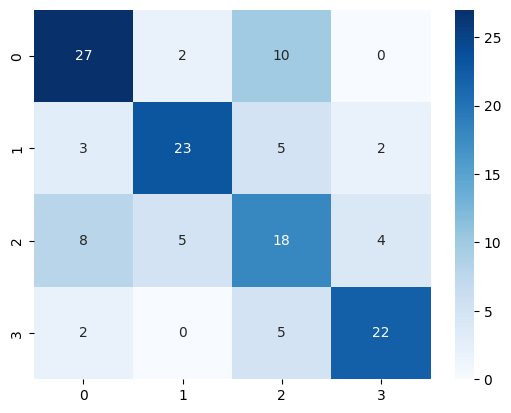

In [724]:
# Classification Metrics

y_pred_proba = model.predict_proba(X_test.values)

print_score(y_test, y_pred, y_pred_proba)

In [725]:
print_answer(model, x_columns)

['A' 'C' 'C' 'C' 'D' 'B' 'D' 'B' 'D' 'C']
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
['A' 'B' 'C' 'D']




---



## **Logistic Regression**

### Import Libraries

In [726]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

### Model

In [727]:
model = LogisticRegression()

In [728]:
model.fit(X_train.values, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [729]:
print("coef :", model.coef_)
print("intercept : ", model.intercept_)

coef : [[ 0.03758544  0.297437    0.01666609 -0.2305867   0.24737764 -0.29997423
   0.18097061 -0.10266167 -0.41687114  0.09543819  0.27404381 -0.31467629
   0.12266605  0.10929798 -0.012287    0.12591906 -0.01009849  0.01118556
  -0.01065768  0.0857533 ]
 [-0.01032541 -0.12158972  0.07257794 -0.13912583  0.09690679  0.24688783
  -0.44415555  0.4615398   0.95386748 -0.33630784 -0.47928689  0.33829342
   0.2673128  -0.71111693  0.26659779 -0.00543008  0.06141599 -0.06500479
  -0.03232741  0.01717912]
 [-0.02969346  0.31132614 -0.23884948  0.20290388 -0.55104343  0.42456354
   0.63003943 -0.12145256 -0.27746097 -0.2971541   0.21492884  0.45993559
  -0.21204992  0.12723783 -0.25978853  0.03356569 -0.08059378  0.00175431
  -0.0078767   0.03614974]
 [ 0.00243343 -0.48717341  0.14960545  0.16680865  0.20675899 -0.37147713
  -0.3668545  -0.23742557 -0.25953537  0.53802374 -0.00968575 -0.48355271
  -0.17792892  0.47458112  0.00547774 -0.15405467  0.02927628  0.05206493
   0.05086179 -0.1390821

### Evaluation

Accuracy : 0.5808823529411765
Precision : 0.5808823529411765
Recall : 0.5808823529411765
F1 : 0.5808823529411765
Confustion Matrix :
 [[23  1 13  2]
 [ 5 16  6  6]
 [ 8  2 20  5]
 [ 0  3  6 20]]
Classification Report :
               precision    recall  f1-score   support

           A       0.64      0.59      0.61        39
           B       0.73      0.48      0.58        33
           C       0.44      0.57      0.50        35
           D       0.61      0.69      0.65        29

    accuracy                           0.58       136
   macro avg       0.60      0.58      0.59       136
weighted avg       0.60      0.58      0.58       136

Roc score : 0.822779763369119
Log Loss : 0.9964921485741352


(0.5808823529411765,
 0.5808823529411765,
 0.5808823529411765,
 0.5808823529411765,
 array([[23,  1, 13,  2],
        [ 5, 16,  6,  6],
        [ 8,  2, 20,  5],
        [ 0,  3,  6, 20]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.64      0.59      0.61        39\n           B       0.73      0.48      0.58        33\n           C       0.44      0.57      0.50        35\n           D       0.61      0.69      0.65        29\n\n    accuracy                           0.58       136\n   macro avg       0.60      0.58      0.59       136\nweighted avg       0.60      0.58      0.58       136\n',
 0.822779763369119,
 0.9964921485741352)

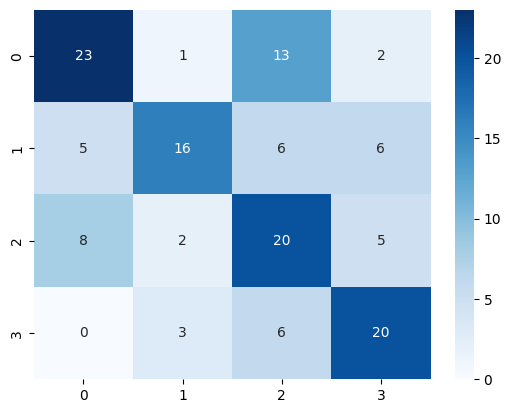

In [730]:
y_pred = model.predict(X_test.values)
y_pred_proba = model.predict_proba(X_test.values)

print_score(y_test, y_pred, y_pred_proba)

### Prediction

In [731]:
# print(" - predicted class:", model.predict([(5,3)])) # NOTE : EDIT VALUE HERE
# print(" - classes :", model.classes_)
# print(" - probabilities :", model.predict_proba([(5,3)]))
print_answer(model, x_columns)

['C' 'C' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'A']
[[0.12243028 0.28848641 0.33638697 0.25269635]
 [0.12963892 0.03122183 0.83213871 0.00700054]
 [0.19222894 0.03955959 0.73682833 0.03138314]
 [0.38968561 0.15537444 0.4495003  0.00543965]
 [0.05203136 0.69269411 0.00708073 0.2481938 ]
 [0.63223802 0.04108653 0.2044549  0.12222056]
 [0.07833515 0.17135891 0.0187194  0.73158654]
 [0.15758942 0.76759963 0.04579447 0.02901648]
 [0.09195403 0.02429786 0.07623331 0.8075148 ]
 [0.65013484 0.17059032 0.09989921 0.07937563]]
['A' 'B' 'C' 'D']




---



## **Naïve Bayes**

### Import Libraries

In [732]:
from sklearn.naive_bayes import GaussianNB

### Model

In [733]:
model = GaussianNB()

In [734]:
model.fit(X_train, y_train)

GaussianNB()

### Evaluation

Accuracy : 0.5735294117647058
Precision : 0.5735294117647058
Recall : 0.5735294117647058
F1 : 0.5735294117647058
Confustion Matrix :
 [[20  7 12  0]
 [ 4 17  8  4]
 [ 2  6 24  3]
 [ 1  2  9 17]]
Classification Report :
               precision    recall  f1-score   support

           A       0.74      0.51      0.61        39
           B       0.53      0.52      0.52        33
           C       0.45      0.69      0.55        35
           D       0.71      0.59      0.64        29

    accuracy                           0.57       136
   macro avg       0.61      0.57      0.58       136
weighted avg       0.61      0.57      0.58       136

Roc score : 0.808482370993403
Log Loss : 1.6131223085239805


(0.5735294117647058,
 0.5735294117647058,
 0.5735294117647058,
 0.5735294117647058,
 array([[20,  7, 12,  0],
        [ 4, 17,  8,  4],
        [ 2,  6, 24,  3],
        [ 1,  2,  9, 17]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.74      0.51      0.61        39\n           B       0.53      0.52      0.52        33\n           C       0.45      0.69      0.55        35\n           D       0.71      0.59      0.64        29\n\n    accuracy                           0.57       136\n   macro avg       0.61      0.57      0.58       136\nweighted avg       0.61      0.57      0.58       136\n',
 0.808482370993403,
 1.6131223085239805)

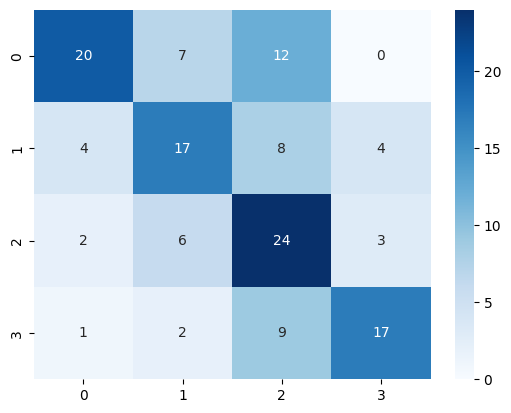

In [735]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print_score(y_test, y_pred, y_pred_proba)

### Prediction

In [736]:
# print(" - predicted class:", model.predict([(5,3)])) # NOTE : EDIT VALUE HERE
# print(" - classes :", model.classes_)
# print(" - probabilities :", model.predict_proba([(5,3)]))
print_answer(model, x_columns)

['D' 'C' 'C' 'B' 'B' 'A' 'D' 'B' 'D' 'A']
[[3.17822372e-02 6.01113101e-03 9.19319810e-02 8.70274651e-01]
 [1.27331217e-01 2.00315711e-04 8.65671559e-01 6.79690770e-03]
 [1.95823104e-02 7.09554127e-06 9.72369741e-01 8.04085298e-03]
 [1.61840758e-02 8.96376647e-01 8.74392628e-02 1.41988395e-08]
 [1.73047089e-02 8.99412110e-01 3.57463575e-08 8.32831453e-02]
 [6.16420578e-01 3.94118756e-04 2.43016410e-01 1.40168893e-01]
 [2.86004502e-02 2.03898641e-02 3.45927221e-03 9.47550413e-01]
 [3.67356941e-02 9.63192563e-01 2.84667721e-07 7.14586473e-05]
 [9.41395688e-03 5.35282347e-06 6.45472989e-02 9.26033391e-01]
 [7.80064929e-01 4.31963354e-02 8.46389568e-02 9.20997788e-02]]
['A' 'B' 'C' 'D']


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


## K-Nearest Neighbors

In [737]:
from sklearn.neighbors import KNeighborsClassifier

In [738]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=7)

Accuracy : 0.8161764705882353
Precision : 0.8161764705882353
Recall : 0.8161764705882353
F1 : 0.8161764705882353
Confustion Matrix :
 [[35  1  3  0]
 [ 2 24  2  5]
 [ 3  3 27  2]
 [ 1  0  3 25]]
Classification Report :
               precision    recall  f1-score   support

           A       0.85      0.90      0.88        39
           B       0.86      0.73      0.79        33
           C       0.77      0.77      0.77        35
           D       0.78      0.86      0.82        29

    accuracy                           0.82       136
   macro avg       0.82      0.81      0.81       136
weighted avg       0.82      0.82      0.82       136

Roc score : 0.9311215124195726
Log Loss : 2.453306870749637


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(0.8161764705882353,
 0.8161764705882353,
 0.8161764705882353,
 0.8161764705882353,
 array([[35,  1,  3,  0],
        [ 2, 24,  2,  5],
        [ 3,  3, 27,  2],
        [ 1,  0,  3, 25]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.85      0.90      0.88        39\n           B       0.86      0.73      0.79        33\n           C       0.77      0.77      0.77        35\n           D       0.78      0.86      0.82        29\n\n    accuracy                           0.82       136\n   macro avg       0.82      0.81      0.81       136\nweighted avg       0.82      0.82      0.82       136\n',
 0.9311215124195726,
 2.453306870749637)

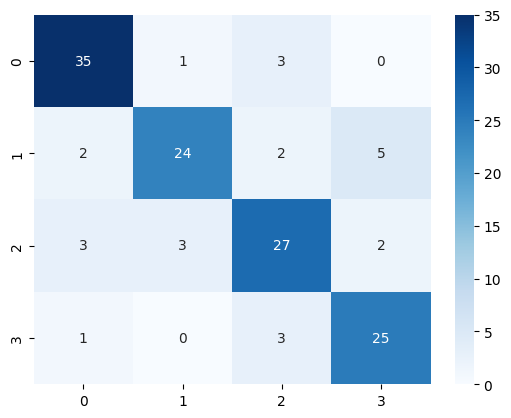

In [739]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print_score(y_test, y_pred, y_pred_proba)

In [740]:
print_answer(model, x_columns)

['D' 'A' 'C' 'C' 'D' 'A' 'D' 'B' 'D' 'B']
[[0.         0.14285714 0.28571429 0.57142857]
 [0.57142857 0.         0.42857143 0.        ]
 [0.14285714 0.         0.85714286 0.        ]
 [0.         0.         1.         0.        ]
 [0.14285714 0.28571429 0.         0.57142857]
 [0.42857143 0.28571429 0.         0.28571429]
 [0.         0.         0.         1.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.57142857 0.14285714 0.28571429]]
['A' 'B' 'C' 'D']


## Artificial Neural Network

In [741]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [742]:
model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, activation="tanh")
model.fit(X_train.values, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10), max_iter=1000)

Accuracy : 0.6544117647058824
Precision : 0.6544117647058824
Recall : 0.6544117647058824
F1 : 0.6544117647058824
Confustion Matrix :
 [[23  6  9  1]
 [ 3 21  5  4]
 [ 5  4 22  4]
 [ 1  1  4 23]]
Classification Report :
               precision    recall  f1-score   support

           A       0.72      0.59      0.65        39
           B       0.66      0.64      0.65        33
           C       0.55      0.63      0.59        35
           D       0.72      0.79      0.75        29

    accuracy                           0.65       136
   macro avg       0.66      0.66      0.66       136
weighted avg       0.66      0.65      0.65       136

Roc score : 0.8771095910214185
Log Loss : 1.0787644914755676


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


(0.6544117647058824,
 0.6544117647058824,
 0.6544117647058824,
 0.6544117647058824,
 array([[23,  6,  9,  1],
        [ 3, 21,  5,  4],
        [ 5,  4, 22,  4],
        [ 1,  1,  4, 23]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.72      0.59      0.65        39\n           B       0.66      0.64      0.65        33\n           C       0.55      0.63      0.59        35\n           D       0.72      0.79      0.75        29\n\n    accuracy                           0.65       136\n   macro avg       0.66      0.66      0.66       136\nweighted avg       0.66      0.65      0.65       136\n',
 0.8771095910214185,
 1.0787644914755676)

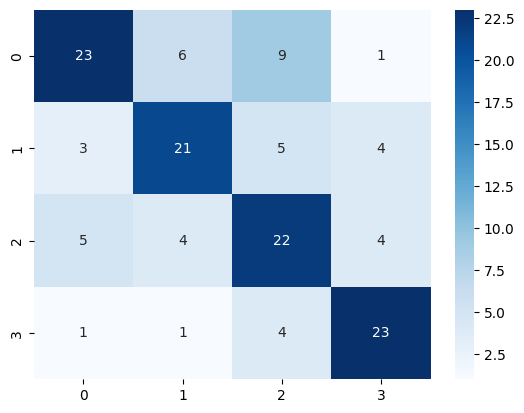

In [743]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print_score(y_test, y_pred, y_pred_proba)

In [744]:

print_answer(model, x_columns)

['D' 'A' 'C' 'C' 'A' 'A' 'D' 'B' 'D' 'A']
[[4.14855114e-04 1.35954947e-02 2.34730982e-01 7.51258668e-01]
 [5.47573967e-01 4.58103305e-02 4.06554805e-01 6.08977702e-05]
 [1.91767587e-02 2.47785647e-05 9.80490707e-01 3.07756062e-04]
 [2.88802566e-01 3.62270663e-02 6.16791404e-01 5.81789630e-02]
 [9.42798362e-01 5.45294553e-03 1.22726273e-02 3.94760651e-02]
 [8.64983033e-01 1.21624927e-01 3.57067287e-03 9.82136715e-03]
 [1.05591488e-04 8.56449374e-03 6.52485627e-04 9.90677429e-01]
 [4.56153767e-04 9.92168731e-01 1.76126740e-03 5.61384745e-03]
 [1.21101921e-03 2.00074423e-02 2.70263151e-03 9.76078907e-01]
 [3.56746934e-01 1.70619183e-01 2.27950265e-01 2.44683618e-01]]
['A' 'B' 'C' 'D']


## K-Fold Cross-Validation

In [745]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier

In [746]:
kf = KFold(n_splits=4)

In [747]:
acc_list = []
prec_list = []
recall_list = []
f1_list = []


for train_index, test_index in kf.split(X):

  # print(train_index, test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='micro')
  con = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("Accuracy (k) :", acc)
  print("Precision (k) :", prec)
  print("Recall (k) :", recall)
  print("F1 (k) :", f1)
  print("Confustion Matrix (k) :\n", con)
  print("Classification Report (k) :\n", report)
  acc_list.append(acc)
  prec_list.append(prec)
  recall_list.append(recall)
  f1_list.append(f1)

print("------------------------------------")
print("Mean Accuracy :", np.mean(acc_list))
print("Mean Precision :", np.mean(prec_list))
print("Mean Recall :", np.mean(recall_list))
print("Mean F1 :", np.mean(f1_list))

Accuracy (k) : 0.7433628318584071
Precision (k) : 0.7433628318584071
Recall (k) : 0.7433628318584071
F1 (k) : 0.7433628318584072
Confustion Matrix (k) :
 [[19  2  1  0]
 [ 3 22  4  2]
 [ 5  1 20  0]
 [ 3  8  0 23]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.63      0.86      0.73        22
           B       0.67      0.71      0.69        31
           C       0.80      0.77      0.78        26
           D       0.92      0.68      0.78        34

    accuracy                           0.74       113
   macro avg       0.75      0.75      0.75       113
weighted avg       0.77      0.74      0.75       113

Accuracy (k) : 0.6814159292035398
Precision (k) : 0.6814159292035398
Recall (k) : 0.6814159292035398
F1 (k) : 0.6814159292035398
Confustion Matrix (k) :
 [[22  2  5  3]
 [ 3 20  3  8]
 [ 4  3 17  4]
 [ 1  0  0 18]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.7

In [748]:
print_answer(model, x_columns)

['D' 'C' 'C' 'C' 'D' 'A' 'D' 'B' 'D' 'B']
[[4.59670148e-12 4.65975639e-07 2.18462787e-04 9.99781071e-01]
 [3.37086621e-01 6.29041080e-09 6.62913373e-01 6.86328206e-18]
 [2.24082244e-03 4.66160202e-08 9.97759131e-01 1.69367962e-12]
 [6.37206336e-08 2.18483061e-03 9.97815106e-01 2.00987306e-24]
 [4.33751116e-13 3.65542500e-03 7.85752383e-08 9.96344496e-01]
 [3.59006307e-01 2.53242878e-01 2.67865262e-01 1.19885553e-01]
 [3.65473188e-11 1.24898960e-20 1.60811338e-18 1.00000000e+00]
 [7.21605850e-03 9.92737259e-01 4.66828332e-05 2.82650013e-15]
 [3.24199256e-06 6.50410254e-11 1.57607314e-10 9.99996758e-01]
 [2.96643826e-03 9.96807660e-01 2.25901421e-04 3.73404655e-10]]
['A' 'B' 'C' 'D']


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [749]:
acc_list = []
prec_list = []
recall_list = []
f1_list = []


for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='micro')
  con = confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("Accuracy (k) :", acc)
  print("Precision (k) :", prec)
  print("Recall (k) :", recall)
  print("F1 (k) :", f1)
  print("Confustion Matrix (k) :\n", con)
  print("Classification Report (k) :\n", report)
  acc_list.append(acc)
  prec_list.append(prec)
  recall_list.append(recall)
  f1_list.append(f1)

print("------------------------------------")
print("Mean Accuracy :", np.mean(acc_list))
print("Mean Precision :", np.mean(prec_list))
print("Mean Recall :", np.mean(recall_list))
print("Mean F1 :", np.mean(f1_list))

Accuracy (k) : 0.7433628318584071
Precision (k) : 0.7433628318584071
Recall (k) : 0.7433628318584071
F1 (k) : 0.7433628318584072
Confustion Matrix (k) :
 [[19  1  2  0]
 [ 2 24  4  1]
 [ 3  4 19  0]
 [ 6  6  0 22]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.63      0.86      0.73        22
           B       0.69      0.77      0.73        31
           C       0.76      0.73      0.75        26
           D       0.96      0.65      0.77        34

    accuracy                           0.74       113
   macro avg       0.76      0.75      0.74       113
weighted avg       0.77      0.74      0.75       113

Accuracy (k) : 0.7079646017699115
Precision (k) : 0.7079646017699115
Recall (k) : 0.7079646017699115
F1 (k) : 0.7079646017699115
Confustion Matrix (k) :
 [[18  1  8  5]
 [ 3 23  4  4]
 [ 4  2 21  1]
 [ 1  0  0 18]]
Classification Report (k) :
               precision    recall  f1-score   support

           A       0.6

In [750]:

print_answer(model, x_columns)

['D' 'A' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'C']
[[1.23348647e-04 1.87258507e-01 9.65600183e-02 7.16058126e-01]
 [5.15912253e-01 1.89203723e-10 4.84087746e-01 1.30483689e-18]
 [2.96920081e-05 1.29562689e-07 9.99970178e-01 2.56510496e-10]
 [1.62751898e-04 7.74652828e-05 9.99759783e-01 1.76285954e-31]
 [9.87565939e-08 6.94238493e-01 1.34395962e-03 3.04417449e-01]
 [9.91288582e-01 8.62064742e-03 9.07652655e-05 5.28814405e-09]
 [4.79620704e-15 2.49996068e-13 3.05105256e-11 1.00000000e+00]
 [1.12973458e-07 9.99999528e-01 3.58779871e-07 5.49688863e-14]
 [2.54911285e-12 6.72684128e-11 1.09443324e-11 1.00000000e+00]
 [1.16509143e-02 1.93222766e-01 7.95126297e-01 2.32961184e-08]]
['A' 'B' 'C' 'D']


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


## Comparisions

In [751]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [752]:
# Decision Tree

acc_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Decision Tree")
print(" Mean Accuracy :", np.mean(acc_list))

------------------------------------
Decision Tree
 Mean Accuracy : 0.6896531289506953


In [753]:
# Logistic Regression

acc_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index] # TODO: FIX iloc
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = LogisticRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Logistic Regression")
print(" Mean Accuracy :", np.mean(acc_list))

------------------------------------
Logistic Regression
 Mean Accuracy : 0.5810287610619469


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [754]:
# Neural Network

acc_list = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index] # TODO: FIX iloc

  model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  acc_list.append(acc)

print("------------------------------------")
print("Neural Network")
print("  Mean Accuracy :", np.mean(acc_list))

------------------------------------
Neural Network
  Mean Accuracy : 0.7339799304677623


## K-Fold Cross Validation 
### Computing cross-validated metrics

In [755]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [756]:
model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5000)
scores = cross_val_score(model, X, y, cv=4, scoring="accuracy")

print("Mean Accuracy :", np.mean(scores))

Mean Accuracy : 0.7672250316055625


### ANSWER (8:2, 7:3)
Tree: 0.74<br />
['B' 'D' 'C' 'C' 'A' 'B' 'D' 'B' 'D' 'C']<br />
Tree: 0.66<br />
['A' 'C' 'C' 'C' 'D' 'B' 'D' 'B' 'D' 'C']<br />

LogisticRegression: 0.64<br />
['C' 'C' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'A']<br />
LogisticRegression: 0.58<br />
['C' 'C' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'A']<br />

Naive Bayes: 0.60<br />
['D' 'C' 'C' 'B' 'B' 'A' 'D' 'B' 'D' 'A']<br />
Naive Bayes: 0.57<br />
['D' 'C' 'C' 'B' 'B' 'A' 'D' 'B' 'D' 'A']<br />

K-NN: 0.85<br />
['D' 'A' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'B'] (Very Accurate)<br />
K-NN: 0.82<br />
['D' 'A' 'C' 'C' 'D' 'A' 'D' 'B' 'D' 'B'] <br />

Aritificial Neural Network: 0.76<br /> 
['D' 'C' 'C' 'C' 'D' 'B' 'D' 'B' 'D' 'B'] (Accurate)<br />
Aritificial Neural Network: 0.65<br />
['D' 'A' 'C' 'C' 'A' 'A' 'D' 'B' 'D' 'A'] <br />

K-Fold (1): 0.75<br /> 
['D' 'A' 'A' 'C' 'D' 'A' 'D' 'B' 'D' 'B']  (Accurate)<br />
K-Fold (1): 0.73<br />
['D' 'C' 'C' 'C' 'D' 'A' 'D' 'B' 'D' 'B'] <br />

K-Fold (2): 0.71<br />
['D' 'C' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'A'] <br />
K-Fold (2): 0.72<br />
['D' 'A' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'C']  (Accurate) <br />

Summarise (by Pop)<br />

['D' 'A' 'C' 'C' 'B' 'A' 'D' 'B' 'D' 'B'] (K-NN, Aritificial Neural Network, K-Fold) <br />
[ _   X   _   _   X   _   _   _   _   X ] <br />

Real answer (score 4/10) <br />  
['B' 'C' 'A' 'C' 'D' 'B' 'D' 'B' 'D' 'A']



---
https://rathachai.creatier.pro/

## つづく